## Train NBEATS Model and save to disk

In [19]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset
from darts.models import NBEATSModel

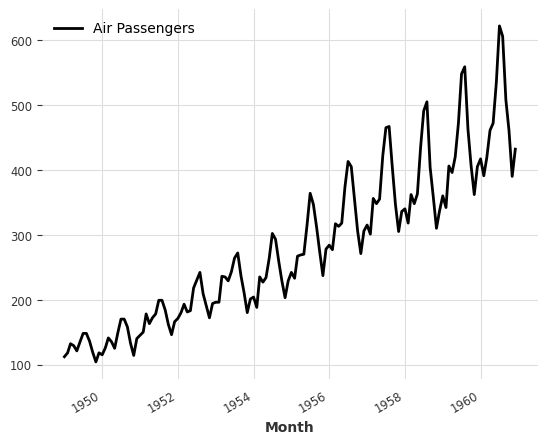

In [20]:
series_air = AirPassengersDataset().load()
series_milk = MonthlyMilkDataset().load()

series_air.plot(label='Air Passengers')

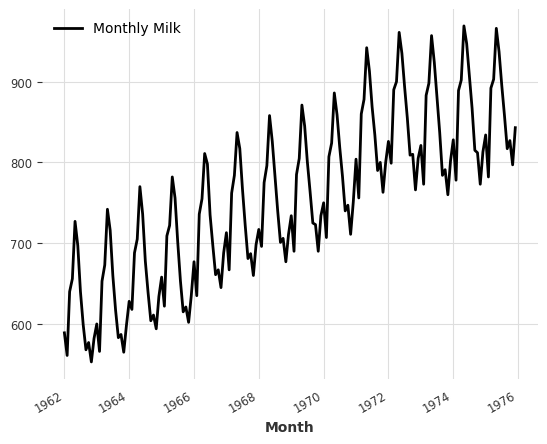

In [21]:
series_milk.plot(label='Monthly Milk')

In [22]:
series_milk.values().shape, series_air.values().shape

((168, 1), (144, 1))

In [23]:
train_air, val_air = series_air[:-36], series_air[-36:]
print(train_air.values().shape, val_air.values().shape)

train_milk, val_milk = series_milk[:-36], series_milk[-36:]
print(train_milk.values().shape, val_milk.values().shape)

(108, 1) (36, 1)
(132, 1) (36, 1)


In [24]:
from darts.dataprocessing.transformers import Scaler

air_scaler, milk_scaler = Scaler(), Scaler()

train_air_scaled = air_scaler.fit_transform(train_air)
val_air_scaled = air_scaler.transform(val_air)

train_milk_scaled = milk_scaler.fit_transform(train_milk)
val_milk_scaled = milk_scaler.transform(val_milk)

In [9]:
model = NBEATSModel(
    input_chunk_length=24,
    output_chunk_length=12,
    n_epochs=100,
)
model.fit([train_air_scaled, train_milk_scaled], verbose=True)

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\Giorgi\anaconda3\envs\torch-cuda\lib\site-packages\pytorch_lightning\trainer\trainer.py:1763: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
49.575    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


In [10]:
model.save('../data/models/nbeats_model')

## Load NBEATS Model and Do Prediction on Validation Data

In [25]:
from darts.models import NBEATSModel
from darts.metrics import mape

model = NBEATSModel.load('../data/models/nbeats_model')

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\Giorgi\anaconda3\envs\torch-cuda\lib\site-packages\pytorch_lightning\trainer\trainer.py:1763: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\Giorgi\anaconda3\envs\torch-cuda\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:219: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

18.815093377906912

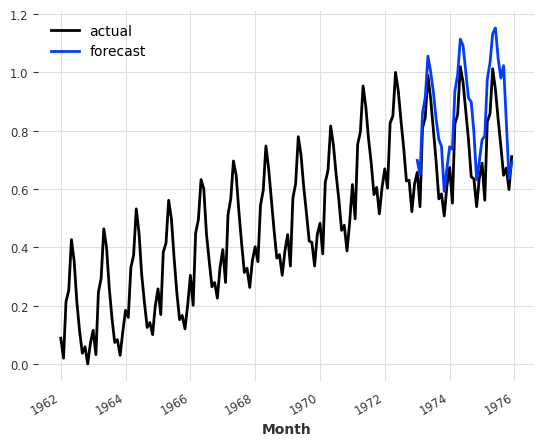

In [26]:
milk_scaled = milk_scaler.transform(series_milk)

predicted = model.predict(36, series=train_milk_scaled)
milk_scaled.plot(label='actual')
predicted.plot(label='forecast')
print('MAPE = ', mape(val_milk_scaled, predicted))

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\Giorgi\anaconda3\envs\torch-cuda\lib\site-packages\pytorch_lightning\trainer\trainer.py:1763: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\Giorgi\anaconda3\envs\torch-cuda\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:219: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

MAPE =  9.483386808096505


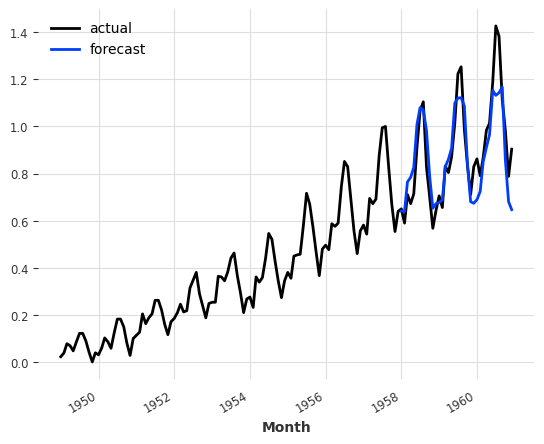

In [27]:
air_scaled = air_scaler.transform(series_air)

predicted = model.predict(36, series=train_air_scaled)
air_scaled.plot(label='actual')
predicted.plot(label='forecast')

print('MAPE = ', mape(val_air_scaled, predicted))

## Add prediction On Dummy Data

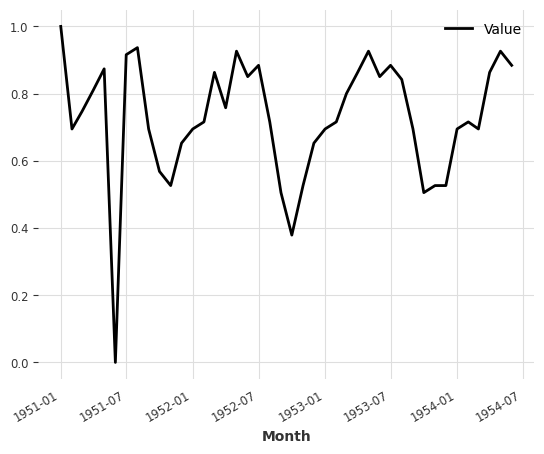

In [15]:
import pandas as pd
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler

df = pd.read_csv('../data/random-time-series.csv')
df['Month'] = pd.to_datetime(df['Month'])

time_series = TimeSeries.from_dataframe(df, 'Month', 'Value')
time_series = Scaler().fit_transform(time_series)
time_series.plot()


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\Giorgi\anaconda3\envs\torch-cuda\lib\site-packages\pytorch_lightning\trainer\trainer.py:1763: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\Giorgi\anaconda3\envs\torch-cuda\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:219: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

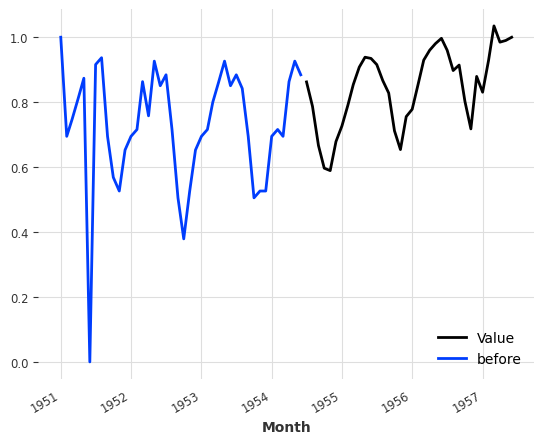

In [17]:
model = NBEATSModel.load('../data/models/nbeats_model')

model.predict(36, series=time_series).plot()
time_series.plot(label='before')